# **Set up the Kaggle to collab**

In [2]:
# Set up Kaggle API and download the dataset
from google.colab import files
import os

# Upload kaggle.json
files.upload()  # This will prompt you to upload kaggle.json

# Set up Kaggle credentials
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


# **Download the tomato leaf Dataset**

In [3]:

# Download dataset from Kaggle
!kaggle datasets download -d charuchaudhry/plantvillage-tomato-leaf-dataset

# Unzip the dataset
!unzip -q plantvillage-tomato-leaf-dataset.zip -d tomato_leaf_dataset


Dataset URL: https://www.kaggle.com/datasets/charuchaudhry/plantvillage-tomato-leaf-dataset
License(s): unknown
 96% 425M/443M [00:00<00:00, 415MB/s]
100% 443M/443M [00:00<00:00, 488MB/s]


# **Import Python libraries**

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader



# **EDA**

## **Count the number of classes in the dataset**

In [5]:
# Set the correct root path
root_path = "tomato_leaf_dataset/plantvillage"

# Exclude wrongly nested folders
class_names = [d for d in os.listdir(root_path)
               if os.path.isdir(os.path.join(root_path, d)) and d != "plantvillage"]


print(f" Found {len(class_names)} classes:")
print(class_names)


 Found 10 classes:
['Tomato___Target_Spot', 'Tomato___Late_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Septoria_leaf_spot', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Leaf_Mold']


## **Images count per class**

<ipython-input-6-791761990>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts.sort_values("Image Count", ascending=False), x="Image Count", y="Class", palette="viridis")


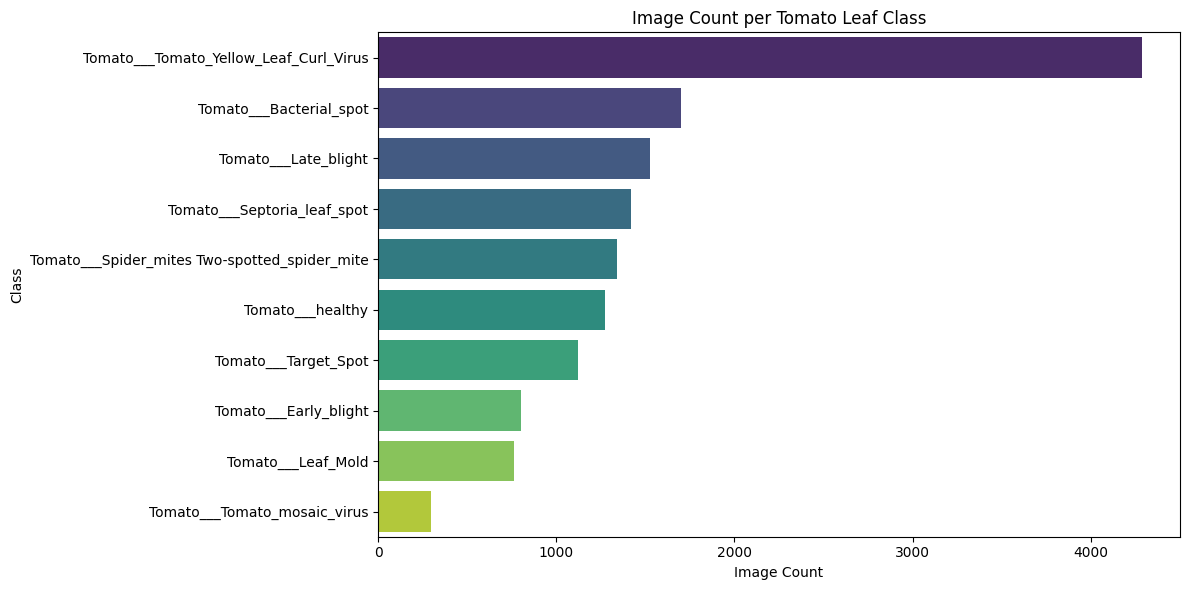

In [6]:


# Count images per class (excluding nested folders)
class_counts = {
    cls: len(os.listdir(os.path.join(root_path, cls)))
    for cls in class_names
}
df_counts = pd.DataFrame(class_counts.items(), columns=["Class", "Image Count"])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_counts.sort_values("Image Count", ascending=False), x="Image Count", y="Class", palette="viridis")
plt.title("Image Count per Tomato Leaf Class")
plt.tight_layout()
plt.show()


In [7]:
df_counts

,Class,Image Count
0,Tomato___Target_Spot,1123
1,Tomato___Late_blight,1527
2,Tomato___Spider_mites Two-spotted_spider_mite,1341
3,Tomato___Tomato_Yellow_Leaf_Curl_Virus,4286
4,Tomato___Bacterial_spot,1702
5,Tomato___Tomato_mosaic_virus,299
6,Tomato___Septoria_leaf_spot,1417
7,Tomato___healthy,1273
8,Tomato___Early_blight,800
9,Tomato___Leaf_Mold,761


**Preprocessing**

In [8]:

# Only use valid root folder
transform = transforms.Compose([
    transforms.Resize((228, 228)),
    transforms.ToTensor()
])

dataset = ImageFolder(root=root_path, transform=transform)

print(f" Dataset size: {len(dataset)}")
print(f" Valid classes: {dataset.classes}")


 Dataset size: 29058
 Valid classes: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy', 'plantvillage']
